In [1]:
import pandas as pd
import datetime
import pickle
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 700)

# Predict PMI and ADD using Gelderman's formulas
Calculate PMI and ADD from the SOD labeled data using Gelderman's outdoor formulas. Since the formulas require a total decompostion score (TDS), the SOD label for each bodypart (same donor and same date) will be added to produce the TDS, which will then be plugged into the formulas.

In [2]:
# import Gelderman SOD-labeled data
with open('./../data/subset_master_dataset_w_weather.pkl', 'rb') as f:
        data_ls = pickle.load(f)
print(len(data_ls))

5565


In [3]:
# convert list of dicts to sodframe
sod_df = pd.DataFrame.from_dict(data_ls)
print(sod_df.shape)
display(sod_df.head())
display(sod_df.info())
display(sod_df.describe())

(5565, 21)


,new_id,old_id,img_path,img,correct_img_date,date_placed_ARF,PMI_days,sex,age_at_death,est_stature_inches,est_weight,true_SOD,true_SOD_BP,ADD_thres0,ADD_thres5,ADD_thres10,ADD_thres15,ADH_thres0,ADH_thres5,ADH_thres10,ADH_thres15
0,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.07.JPG,00400124.07.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,torso,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35
1,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.10.JPG,00400124.10.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,legs,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35
2,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.11.JPG,00400124.11.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,legs,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35
3,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.12.JPG,00400124.12.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,head,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35
4,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.13.JPG,00400124.13.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,head,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   new_id              5565 non-null   object        
 1   old_id              5565 non-null   object        
 2   img_path            5565 non-null   object        
 3   img                 5565 non-null   object        
 4   correct_img_date    5565 non-null   datetime64[ns]
 5   date_placed_ARF     5565 non-null   datetime64[ns]
 6   PMI_days            5565 non-null   float64       
 7   sex                 5565 non-null   float64       
 8   age_at_death        5565 non-null   float64       
 9   est_stature_inches  5565 non-null   float64       
 10  est_weight          5565 non-null   float64       
 11  true_SOD            5565 non-null   float64       
 12  true_SOD_BP         5565 non-null   object        
 13  ADD_thres0          5565 non-null   float64     

None

,PMI_days,sex,age_at_death,est_stature_inches,est_weight,true_SOD,ADD_thres0,ADD_thres5,ADD_thres10,ADD_thres15,ADH_thres0,ADH_thres5,ADH_thres10,ADH_thres15
count,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000,5565.000000
mean,49.664331,0.484816,66.056604,155.004972,184.267565,3.527763,708.290345,690.390777,635.252086,526.452252,17123.411344,16750.067399,15539.655443,13146.278034
std,55.519650,0.499814,14.540983,38.573655,58.632396,1.157832,897.411421,889.248872,863.837315,788.885445,21600.033467,21403.362741,20699.314494,19118.359568
min,0.000000,0.000000,21.000000,0.000000,95.000000,1.000000,0.735417,0.000000,0.000000,0.000000,55.500000,28.450000,0.000000,0.000000
25%,14.000000,0.000000,58.000000,160.020000,144.000000,3.000000,169.334067,153.600799,115.196181,53.183333,4356.442619,3890.429167,3155.655000,1854.531667
50%,31.000000,0.000000,67.000000,167.640000,174.000000,3.000000,409.313144,386.366424,342.317959,228.923148,9914.536190,9472.987500,8609.778333,6151.056667
75%,71.000000,1.000000,76.000000,175.260000,210.000000,4.000000,902.689834,876.523317,834.103166,622.933814,21615.516667,21425.544008,19793.244008,15544.623333
max,450.000000,1.000000,96.000000,195.580000,516.000000,6.000000,5807.064398,5619.145350,5229.522822,4511.635084,140976.538945,137072.899421,126508.944401,110144.846306


In [4]:
sod_df.true_SOD_BP.unique()

array(['torso', 'legs', 'head', 'arm'], dtype=object)

In [8]:
# split sod_df into seperate dataframes
head_sod_df = sod_df[sod_df.true_SOD_BP == 'head'].copy()
torso_sod_df = sod_df[sod_df.true_SOD_BP == 'torso'].copy()
limbs_sod_df = sod_df[(sod_df.true_SOD_BP == 'arm') | (sod_df.true_SOD_BP == 'legs')].copy()
print(sod_df.shape, head_sod_df.shape, torso_sod_df.shape, limbs_sod_df.shape)

(5565, 21) (1834, 21) (1818, 21) (1913, 21)


In [9]:
# extract donor and date from img column
head_sod_df['donorDate'] = head_sod_df.img.str.split('.', expand=True)[0]
display(head_sod_df.head(3))
torso_sod_df['donorDate'] = torso_sod_df.img.str.split('.', expand=True)[0]
display(torso_sod_df.head(3))
limbs_sod_df['donorDate'] = limbs_sod_df.img.str.split('.', expand=True)[0]
display(limbs_sod_df.head(3))

,new_id,old_id,img_path,img,correct_img_date,date_placed_ARF,PMI_days,sex,age_at_death,est_stature_inches,est_weight,true_SOD,true_SOD_BP,ADD_thres0,ADD_thres5,ADD_thres10,ADD_thres15,ADH_thres0,ADH_thres5,ADH_thres10,ADH_thres15,donorDate
3,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.12.JPG,00400124.12.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,head,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35,00400124
4,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.13.JPG,00400124.13.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,head,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35,00400124
5,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.14.JPG,00400124.14.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,head,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35,00400124


,new_id,old_id,img_path,img,correct_img_date,date_placed_ARF,PMI_days,sex,age_at_death,est_stature_inches,est_weight,true_SOD,true_SOD_BP,ADD_thres0,ADD_thres5,ADD_thres10,ADD_thres15,ADH_thres0,ADH_thres5,ADH_thres10,ADH_thres15,donorDate
0,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.07.JPG,00400124.07.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,torso,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35,00400124
9,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.22.JPG,00400124.22.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,torso,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35,00400124
10,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.23.JPG,00400124.23.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,torso,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35,00400124


,new_id,old_id,img_path,img,correct_img_date,date_placed_ARF,PMI_days,sex,age_at_death,est_stature_inches,est_weight,true_SOD,true_SOD_BP,ADD_thres0,ADD_thres5,ADD_thres10,ADD_thres15,ADH_thres0,ADH_thres5,ADH_thres10,ADH_thres15,donorDate
1,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.10.JPG,00400124.10.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,legs,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35,00400124
2,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.11.JPG,00400124.11.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,3.0,legs,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35,00400124
7,004,UT06-18D,/da1_data/icputrd/arf/mean.js/public/anau_img3/004/00400124.18.JPG,00400124.18.JPG,2018-01-24,2018-01-09,15.0,0.0,77.0,64.0,180.0,4.0,legs,73.881146,65.115868,32.350972,0.0,1881.8375,1634.070833,1081.443333,362.35,00400124


In [10]:
# keep only one image per donorDate
head_sod_df.drop_duplicates(subset=['donorDate'], inplace=True)
torso_sod_df.drop_duplicates(subset=['donorDate'], inplace=True)
limbs_sod_df.drop_duplicates(subset=['donorDate'], inplace=True)
print(head_sod_df.shape, torso_sod_df.shape, limbs_sod_df.shape)

(423, 22) (405, 22) (180, 22)


In [12]:
# align dataframes on donorDate column
head_torso_merge = pd.merge(head_sod_df[['donorDate','img','true_SOD']] , torso_sod_df[['donorDate', 'img','true_SOD']], how='inner', on='donorDate')
print(head_torso_merge.shape)

head_torso_limbs_merge = pd.merge(head_torso_merge, limbs_sod_df[['donorDate', 'date_placed_ARF', 'correct_img_date','img','true_SOD', 'PMI_days', 'ADD_thres0']], how='inner', on='donorDate')
print(head_torso_limbs_merge.shape)
head_torso_limbs_merge.head()

(382, 5)
(161, 11)


,donorDate,img_x,true_SOD_x,img_y,true_SOD_y,date_placed_ARF,correct_img_date,img,true_SOD,PMI_days,ADD_thres0
0,00400124,00400124.12.JPG,3.0,00400124.07.JPG,3.0,2018-01-09,2018-01-24,00400124.10.JPG,3.0,15.0,73.881146
1,00b00525,00b00525.08.JPG,5.0,00b00525.04.JPG,5.0,2016-03-07,2016-05-25,00b00525.27.JPG,3.0,79.0,1326.323441
2,00b00818,00b00818.07.JPG,6.0,00b00818.05.JPG,6.0,2016-03-07,2016-08-18,00b00818.11.JPG,3.0,164.0,3552.068684
3,00d10116,00d10116.07.JPG,5.0,00d10116.04.JPG,4.0,2018-11-27,2019-01-16,00d10116.06.JPG,4.0,50.0,317.835928
4,01101210,01101210.06.JPG,2.0,01101210.03.JPG,2.0,2018-11-29,2018-12-10,01101210.08.JPG,2.0,11.0,69.692188


In [14]:
# calculate total decomposition score (TDS)
head_torso_limbs_merge['TDS'] = head_torso_limbs_merge['true_SOD_x']+head_torso_limbs_merge['true_SOD_x']+head_torso_limbs_merge['true_SOD']
head_torso_limbs_merge.head()

,donorDate,img_x,true_SOD_x,img_y,true_SOD_y,date_placed_ARF,correct_img_date,img,true_SOD,PMI_days,ADD_thres0,TDS
0,00400124,00400124.12.JPG,3.0,00400124.07.JPG,3.0,2018-01-09,2018-01-24,00400124.10.JPG,3.0,15.0,73.881146,9.0
1,00b00525,00b00525.08.JPG,5.0,00b00525.04.JPG,5.0,2016-03-07,2016-05-25,00b00525.27.JPG,3.0,79.0,1326.323441,13.0
2,00b00818,00b00818.07.JPG,6.0,00b00818.05.JPG,6.0,2016-03-07,2016-08-18,00b00818.11.JPG,3.0,164.0,3552.068684,15.0
3,00d10116,00d10116.07.JPG,5.0,00d10116.04.JPG,4.0,2018-11-27,2019-01-16,00d10116.06.JPG,4.0,50.0,317.835928,14.0
4,01101210,01101210.06.JPG,2.0,01101210.03.JPG,2.0,2018-11-29,2018-12-10,01101210.08.JPG,2.0,11.0,69.692188,6.0


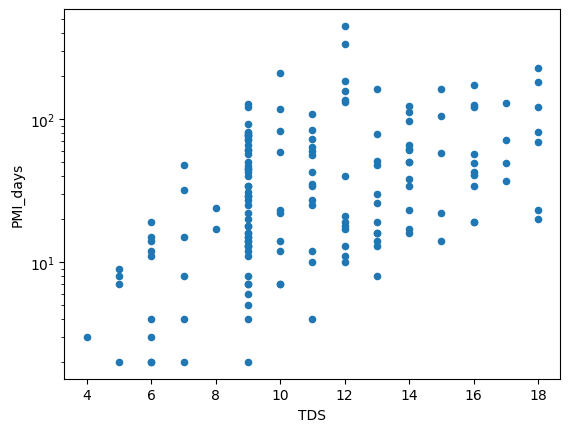

In [39]:
head_torso_limbs_merge2.plot.scatter(x = 'TDS', y = 'PMI_days', logy=True)
plt.show()

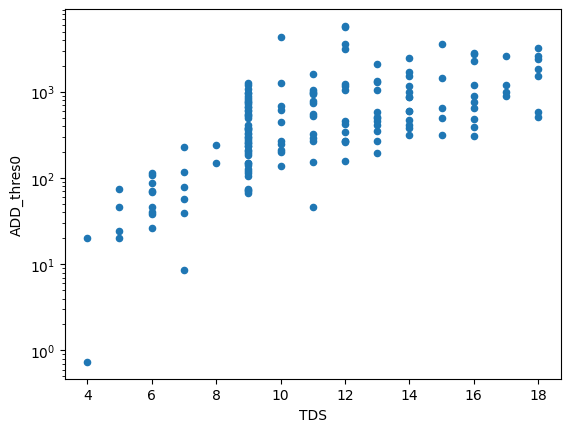

In [40]:
head_torso_limbs_merge2.plot.scatter(x = 'TDS', y = 'ADD_thres0', logy=True)
plt.show()

In [15]:
# Apply Gelderman's PMI formula to the SOD predictions
def pmi(TDS):
    pmi = 10**(-0.93 + (0.18*TDS))
    return pmi

head_torso_limbs_merge['pred_PMI'] = head_torso_limbs_merge['TDS'].apply(pmi)
display(head_torso_limbs_merge.head())

,donorDate,img_x,true_SOD_x,img_y,true_SOD_y,date_placed_ARF,correct_img_date,img,true_SOD,PMI_days,ADD_thres0,TDS,pred_PMI
0,00400124,00400124.12.JPG,3.0,00400124.07.JPG,3.0,2018-01-09,2018-01-24,00400124.10.JPG,3.0,15.0,73.881146,9.0,4.897788
1,00b00525,00b00525.08.JPG,5.0,00b00525.04.JPG,5.0,2016-03-07,2016-05-25,00b00525.27.JPG,3.0,79.0,1326.323441,13.0,25.703958
2,00b00818,00b00818.07.JPG,6.0,00b00818.05.JPG,6.0,2016-03-07,2016-08-18,00b00818.11.JPG,3.0,164.0,3552.068684,15.0,58.884366
3,00d10116,00d10116.07.JPG,5.0,00d10116.04.JPG,4.0,2018-11-27,2019-01-16,00d10116.06.JPG,4.0,50.0,317.835928,14.0,38.904514
4,01101210,01101210.06.JPG,2.0,01101210.03.JPG,2.0,2018-11-29,2018-12-10,01101210.08.JPG,2.0,11.0,69.692188,6.0,1.412538


In [41]:
# Apply Gelderman's ADD formula to the SOD predictions
def add(TDS):
    add = 10**(0.03 + (0.19*TDS))
    return add

head_torso_limbs_merge['pred_ADD'] = head_torso_limbs_merge['TDS'].apply(add)
display(head_torso_limbs_merge.head())

,donorDate,img_x,true_SOD_x,img_y,true_SOD_y,date_placed_ARF,correct_img_date,img,true_SOD,PMI_days,ADD_thres0,TDS,pred_PMI,pred_ADD
0,00400124,00400124.12.JPG,3.0,00400124.07.JPG,3.0,2018-01-09,2018-01-24,00400124.10.JPG,3.0,15.0,73.881146,9.0,4.897788,54.954087
1,00b00525,00b00525.08.JPG,5.0,00b00525.04.JPG,5.0,2016-03-07,2016-05-25,00b00525.27.JPG,3.0,79.0,1326.323441,13.0,25.703958,316.227766
2,00b00818,00b00818.07.JPG,6.0,00b00818.05.JPG,6.0,2016-03-07,2016-08-18,00b00818.11.JPG,3.0,164.0,3552.068684,15.0,58.884366,758.577575
3,00d10116,00d10116.07.JPG,5.0,00d10116.04.JPG,4.0,2018-11-27,2019-01-16,00d10116.06.JPG,4.0,50.0,317.835928,14.0,38.904514,489.778819
4,01101210,01101210.06.JPG,2.0,01101210.03.JPG,2.0,2018-11-29,2018-12-10,01101210.08.JPG,2.0,11.0,69.692188,6.0,1.412538,14.791084


In [42]:
# calculate standard errors and compare with Gelderman's study 
print((head_torso_limbs_merge['PMI_days'] - head_torso_limbs_merge['pred_PMI']).std())
print((head_torso_limbs_merge['ADD_thres0'] - head_torso_limbs_merge['pred_ADD']).std())

# The standard error of the estimate for the regression model is the standard deviation of the errors/residuals.

66.49938888515321
954.768719039803


In [45]:
from sklearn.metrics import r2_score

# Coefficient of determination also called as R2 score is used to evaluate the performance of a linear 
# regression model. It is the amount of the variation in the output dependent attribute which is predictable 
# from the input independent variable(s). It is used to check how well-observed results are reproduced by 
# the model, depending on the ratio of total deviation of results described by the model.

print(r2_score(head_torso_limbs_merge['PMI_days'], head_torso_limbs_merge['pred_PMI']))
print(r2_score(head_torso_limbs_merge['ADD_thres0'], head_torso_limbs_merge['pred_ADD']))

# Negative R2 means model fits your data very badly

-0.329298482313485
-0.13753938124599108


### Derive predicted PMI from pred_ADD
This will require the true PMI and weather history per image. See 03_sod_pmi_to_add.ipynb for ADD calculations details. We will now go backwards, meaning deriving the PMI from the predicted ADD. Note, to align with Gelderman's study, a daily temperature below 0 degrees C is counted as 0 since decomposition stops below freezing. Usually, higher temps, faster decomposition, and so smaller PMI, while lower temps, slower decomposition, and so higher PMI. 

In [23]:
# import weather history
weather_df = pd.read_pickle('./../../temp_humidity_data/data/LCD/lcd_daily_avg.pkl')
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%Y-%m-%d', errors='coerce')
display(weather_df.head())
display(weather_df.info())

,date,HourlyDryBulbTemperature,HourlyRelativeHumidity
0,2011-01-01,11.472727,91.803030
1,2011-01-02,3.828571,64.628571
2,2011-01-03,-0.068750,57.812500
3,2011-01-04,3.084375,60.156250
4,2011-01-05,1.008333,83.216667


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4473 entries, 0 to 4472
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      4473 non-null   datetime64[ns]
 1   HourlyDryBulbTemperature  4473 non-null   float64       
 2   HourlyRelativeHumidity    4473 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 139.8 KB


None

In [25]:
# derive predicted PMI from predicted ADD
df_dict = head_torso_limbs_merge.to_dict('records')
for row in df_dict:
    placement_date = row['date_placed_ARF']   
    img_date = row['correct_img_date']
    pred_ADD = row['pred_ADD']
    
    current_ADD = 0
    derived_PMI = 0
    start_date = placement_date
    while (current_ADD < pred_ADD):
        temp = weather_df[weather_df.date == start_date]['HourlyDryBulbTemperature'] .values[0]
        if temp < 0:
            current_ADD += 0
        else:
            current_ADD += temp
        
        derived_PMI += 1
        
        start_date += datetime.timedelta(days=1)
        #print('date:'+str(start_date)+', current_ADD:'+str(current_ADD)+', temp:'+str(temp),  end="\n")
    row['derived_PMI_from_ADD'] = derived_PMI
    #print()

In [26]:
head_torso_limbs_merge2 = pd.DataFrame.from_dict(df_dict)
display(head_torso_limbs_merge2.head())
print(head_torso_limbs_merge2.shape)

,donorDate,img_x,true_SOD_x,img_y,true_SOD_y,date_placed_ARF,correct_img_date,img,true_SOD,PMI_days,ADD_thres0,TDS,pred_PMI,pred_ADD,derived_PMI_from_ADD
0,00400124,00400124.12.JPG,3.0,00400124.07.JPG,3.0,2018-01-09,2018-01-24,00400124.10.JPG,3.0,15.0,73.881146,9.0,4.897788,54.954087,14
1,00b00525,00b00525.08.JPG,5.0,00b00525.04.JPG,5.0,2016-03-07,2016-05-25,00b00525.27.JPG,3.0,79.0,1326.323441,13.0,25.703958,316.227766,22
2,00b00818,00b00818.07.JPG,6.0,00b00818.05.JPG,6.0,2016-03-07,2016-08-18,00b00818.11.JPG,3.0,164.0,3552.068684,15.0,58.884366,758.577575,51
3,00d10116,00d10116.07.JPG,5.0,00d10116.04.JPG,4.0,2018-11-27,2019-01-16,00d10116.06.JPG,4.0,50.0,317.835928,14.0,38.904514,489.778819,81
4,01101210,01101210.06.JPG,2.0,01101210.03.JPG,2.0,2018-11-29,2018-12-10,01101210.08.JPG,2.0,11.0,69.692188,6.0,1.412538,14.791084,3


(161, 15)


In [ ]:
head_torso_limbs_merge2.to_pickle('./head_torso_limbs_merge2.pkl')